In [1]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2025-02-06 17:12:25.119721: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-06 17:12:25.122923: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-06 17:12:25.132521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738861945.147609   43749 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738861945.151855   43749 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-06 17:12:25.167969: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# Creating and splitting dataframe

train_dir = './data/raw/train'

image_paths = []
labels = []

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            image_paths.append(f'{class_name}/{filename}')
            labels.append(class_name)

df = pd.DataFrame({'filename': image_paths, 'label':labels})

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.head()

,filename,label
23311,cat/cat.11209.jpg,cat
23623,cat/cat.2658.jpg,cat
1020,dog/dog.12201.jpg,dog
12645,cat/cat.8552.jpg,cat
1533,dog/dog.10743.jpg,dog


In [3]:
image_size = (200, 200)

datagen = ImageDataGenerator(rescale=1.0/255)

train_data = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=64,
    class_mode='categorical'
    )

test_data = datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    target_size=image_size,
    batch_size=64,
    class_mode='categorical'
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [4]:
model = Sequential()

model.add(Conv2D(input_shape=(200,200,3), filters=16, kernel_size=(3,3), padding='valid', activation=None))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters = 16, kernel_size = (3,3), padding = "valid", activation = None))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPool2D(pool_size =(2,2),strides =(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-06 17:12:30.344430: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-02-06 17:12:30.409791: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2025-02-06 17:12:30.515471: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2025-02-06 17:12:30.539508: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.


In [5]:
checkpoint = ModelCheckpoint('opt_model.keras', monitor = "val_accuracy", verbose = 1, save_best_only = True, save_weights_only = False, mode = "auto")
early = EarlyStopping(monitor = "val_accuracy", patience = 3, verbose = 1, mode = "auto")
hist = model.fit(train_data, steps_per_epoch = 31, validation_data = test_data, validation_steps = 10, epochs = 10, callbacks = [checkpoint, early])

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-02-06 17:12:32.086036: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 78675968 exceeds 10% of free system memory.
2025-02-06 17:12:33.082808: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30720000 exceeds 10% of free system memory.


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5702 - loss: 1.0438
Epoch 1: val_accuracy improved from -inf to 0.46562, saving model to opt_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5708 - loss: 1.0388 - val_accuracy: 0.4656 - val_loss: 0.8555
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6367 - loss: 0.7085
Epoch 2: val_accuracy improved from 0.46562 to 0.50781, saving model to opt_model.keras
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6370 - loss: 0.7078 - val_accuracy: 0.5078 - val_loss: 0.9282
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6305 - loss: 0.6955
Epoch 3: val_accuracy did not improve from 0.50781
31/31 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.6307 - loss: 0.6949 - val_accuracy: 0.4484 - val_loss: 1.0451
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6631 - loss: 0.6229
Epoch 4: val_accuracy did not improve from 0.50781
31/31 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6636 -

In [6]:
train_data.class_indices

{'cat': 0, 'dog': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


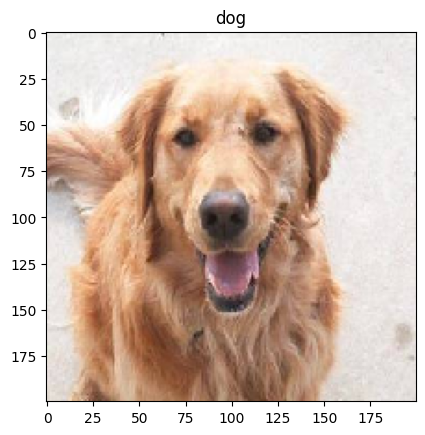

In [13]:
# Predict a random image

rand_num = np.random.randint(1,12500)
path_to_rand = './data/raw/test/' + str(rand_num) + '.jpg'

img = image.load_img(path_to_rand, target_size=(200,200))

img = np.asarray(img)

plt.imshow(img)

img = np.expand_dims(img, axis=0)

output = model.predict(img)

if output[0][0] > output[0][1]:
    plt.title('cat')
else:
    plt.title('dog')
